In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print(X)
print(Y)

[6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
[6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


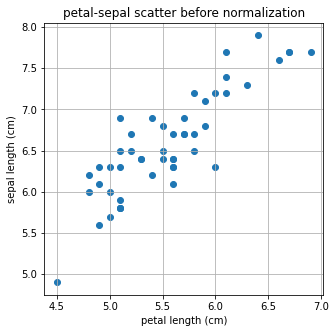

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

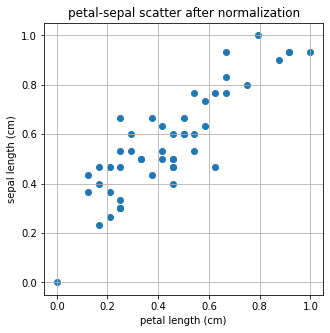

In [4]:
from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

정규화

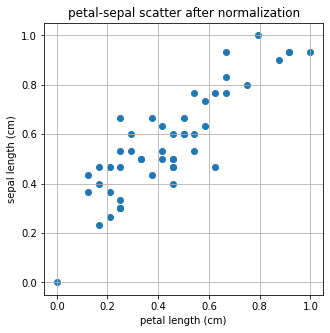

In [5]:
from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


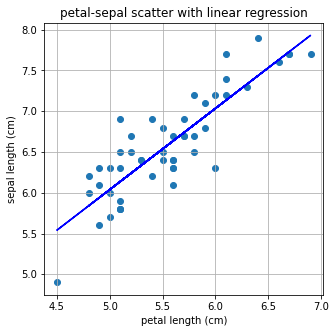

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

L1 Ridge

기울기 : 0.00, 절편 : 6.59


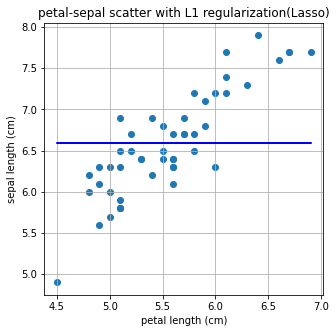

In [8]:
#L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b=L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

L2 Lasso

기울기 : 0.93, 절편 : 1.41


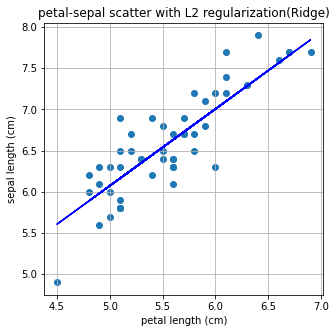

In [9]:
#L2 regularization은 Ridge로 import 합니다. 
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

L1 Regularization 답이 나오지 않는 이유
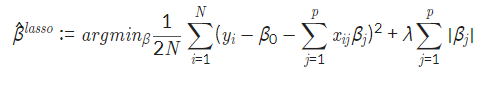  
그러나 우리는 X를 petal length Y를 sepal length, n = 50, p=1인 선형회귀를 풀었음  
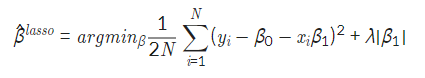  
어떤 값이 최대나 최소가 되려면 미분값이 0이 될때, 이때 B1에 대해 미분을 하게되면  
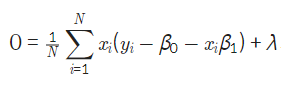  
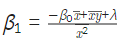  
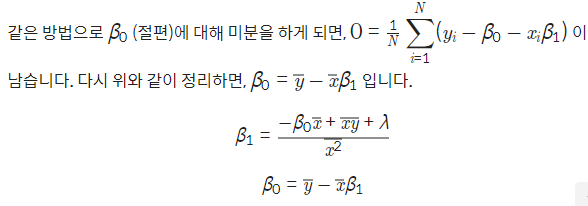  
p=1인경우 B0에 대해 미분하는 과정에서 λ가 사라지므로 Regularization 효과를 볼 수 없음  
L1 Regularization을 사용할때는 X가 2차원 이상인 여러 컬럼 값이 있는 데이터일때 실제 효과 가능

In [13]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [14]:
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [15]:
target_df.head(5)

,Y
0,0
1,0
2,0
3,0
4,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터를 준비하고
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델을 훈련시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트를 해볼까요?
model.predict(X_test)
pred = model.predict(X_test)

# 테스트 결과는 이렇습니다!
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

result of linear regression
Mean Absolute Error: 0.25128973939722626
Mean Squared Error: 0.1062458740952556
Mean Root Squared Error: 0.32595379134971814


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


In [17]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델을 준비하고 훈련시킵니다.
L1 = Lasso(alpha=0.05)
L1.fit(X_train, y_train)

# 테스트를 해봅시다.
pred = L1.predict(X_test)

# 모델 성능은 얼마나 좋을까요?
print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24233731936122138
Mean Squared Error: 0.0955956894578189
Mean Root Squared Error: 0.3091855259513597


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


Linear Regression과 L1 Regularization의 차이가 좀 더 두드러짐  
반면 L1 Regularization에선 총 13개 중 7개를 제외한 나머지 값들이 모두 0

L2 Regularization 정의  
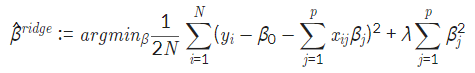  
L1 Regularization 정의  
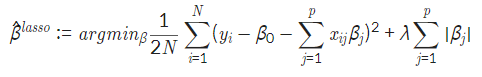  
둘의 차이  
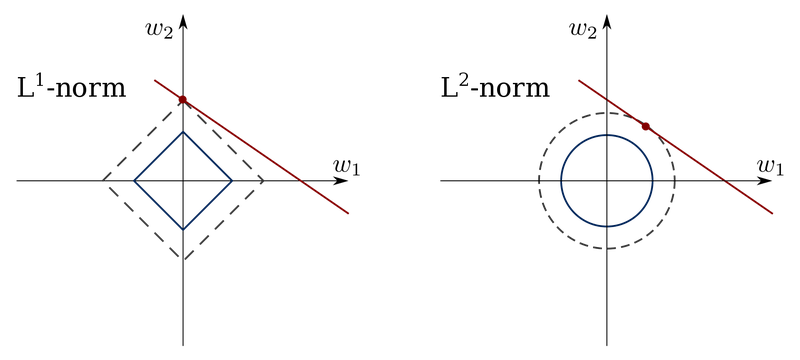  


In [18]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size= 0.3, random_state=101)

=3


In [19]:
from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.05, max_iter=5)
L1.fit(X_train, y_train)
pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24845768841769436
Mean Squared Error: 0.10262989110341268
Mean Root Squared Error: 0.32035900346862844


 coefficient of Lasso
[-0.          0.         -0.          0.03295564  0.00109495  0.
 -0.4027847   0.          0.          0.06023131 -0.         -0.12001119
 -0.00078971]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.924e+00, tolerance: 7.480e-03
  model = cd_fast.enet_coordinate_descent(


In [20]:
from sklearn.linear_model import Ridge

L2 = Ridge(alpha=0.05,max_iter=5)
L2.fit(X_train, y_train)
pred = L2.predict(X_test)

print("result of Ridge")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Ridge")
print(L2.coef_)

result of Ridge
Mean Absolute Error: 0.251146695993643
Mean Squared Error: 0.10568076460795564
Mean Root Squared Error: 0.3250857803841251


 coefficient of Ridge
[[-8.12456257e-02  4.35541496e-02 -1.21661565e-01  3.65979773e-02
  -3.94014013e-04  1.39168707e-01 -4.50691113e-01 -4.87216747e-01
   9.54111059e-02  5.37077039e-02 -1.28602933e-01 -2.89832790e-01
  -5.73136185e-04]]


정리하면, L1 Regularization은 가중치가 적은 벡터에 해당하는 계수를 0으로 보내면서 차원 축소와 비슷한 역할을 하는 것이 특징이며, L2 Regularization은 0이 아닌 0에 가깝게 보내지만 제곱 텀이 있기 때문에 L1 Regularization보다는 수렴 속도가 빠르다는 장점이 있습니다. 예를 들어, A=[1,1,1,1,1]A=[1,1,1,1,1] , B=[5,0,0,0,0]B=[5,0,0,0,0] 의 경우 L1-norm은 같지만, L2-norm은 같지 않습니다. 즉, 제곱 텀에서 결과에 큰 영향을 미치는 값은 더 크게, 결과에 영향이 적은 값들은 더 작게 보내면서 수렴 속도가 빨라지는 것입니다.

Lp norm 
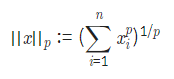

In [21]:
x=np.array([1,10,1,1,1])
p=5
norm_x=np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 10.00008 
result of making norm : 10.00008 


In [22]:
norm_x=np.linalg.norm(x, ord=np.inf)
print("result of infinite norm : %0.5f "%norm_x)

result of infinite norm : 10.00000 


matrix norm  
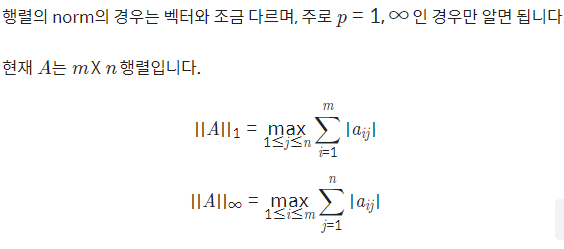  
p=1인 경우 컬럼의 합이 가장 큰 값, p = 무한대는 로우의 합이 가장 큰 값

In [23]:
A=np.array([[1,2,3],[1,2,3],[4,6,8]])
inf_norm_A=np.linalg.norm(A, ord=np.inf)
print("result inf norm of A :", inf_norm_A)
one_norm_A=np.linalg.norm(A, ord=1)
print("result one norm of A :", one_norm_A)

result inf norm of A : 18.0
result one norm of A : 14.0


drop out

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist

=3


In [25]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 아래의 실습과 같습니다.
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 2ms/step - loss: 1.4130 - accuracy: 0.4481
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1976 - accuracy: 0.5183
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1564 - accuracy: 0.5337
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1251 - accuracy: 0.5445
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1138 - accuracy: 0.5502


In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 이번에는 dropout layer가 없습니다. 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4931 - accuracy: 0.8272
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3736 - accuracy: 0.8656
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3366 - accuracy: 0.8763
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3112 - accuracy: 0.8861
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2954 - accuracy: 0.8910


실습

In [28]:
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

#Dense layer만으로 만들어 낸 classification 모델입니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 5ms/step - loss: 2.0598 - accuracy: 0.5285 - val_loss: 1.6638 - val_accuracy: 0.5783
Epoch 2/200
117/117 [==============================] - 0s 4ms/step - loss: 1.4160 - accuracy: 0.5966 - val_loss: 1.1920 - val_accuracy: 0.6717
Epoch 3/200
117/117 [==============================] - 0s 3ms/step - loss: 1.0814 - accuracy: 0.6810 - val_loss: 0.9591 - val_accuracy: 0.7267
Epoch 4/200
117/117 [==============================] - 0s 3ms/step - loss: 0.9000 - accuracy: 0.7167 - val_loss: 0.8240 - val_accuracy: 0.7467
Epoch 5/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7935 - accuracy: 0.7331 - val_loss: 0.7456 - val_accuracy: 0.7617
Epoch 6/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7305 - accuracy: 0.7471 - val_loss: 0.6951 - val_accuracy: 0.7717
Epoch 7/200
117/117 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.7558 - val_loss: 0.6561 - val_accuracy: 0.7850

Epoch 58/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3941 - accuracy: 0.8614 - val_loss: 0.3994 - val_accuracy: 0.8333
Epoch 59/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3921 - accuracy: 0.8627 - val_loss: 0.3978 - val_accuracy: 0.8417
Epoch 60/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3908 - accuracy: 0.8626 - val_loss: 0.3943 - val_accuracy: 0.8383
Epoch 61/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3895 - accuracy: 0.8630 - val_loss: 0.3931 - val_accuracy: 0.8333
Epoch 62/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3879 - accuracy: 0.8631 - val_loss: 0.3973 - val_accuracy: 0.8350
Epoch 63/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8633 - val_loss: 0.3905 - val_accuracy: 0.8383
Epoch 64/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3853 - accuracy: 0.8641 - val_loss: 0.3924 - val_accuracy:

Epoch 115/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3369 - accuracy: 0.8807 - val_loss: 0.3540 - val_accuracy: 0.8567
Epoch 116/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3358 - accuracy: 0.8810 - val_loss: 0.3564 - val_accuracy: 0.8517
Epoch 117/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3354 - accuracy: 0.8810 - val_loss: 0.3554 - val_accuracy: 0.8500
Epoch 118/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3348 - accuracy: 0.8812 - val_loss: 0.3476 - val_accuracy: 0.8550
Epoch 119/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3337 - accuracy: 0.8818 - val_loss: 0.3552 - val_accuracy: 0.8533
Epoch 120/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3343 - accuracy: 0.8812 - val_loss: 0.3518 - val_accuracy: 0.8567
Epoch 121/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3326 - accuracy: 0.8822 - val_loss: 0.3501 - val_ac

117/117 [==============================] - 0s 3ms/step - loss: 0.3039 - accuracy: 0.8915 - val_loss: 0.3347 - val_accuracy: 0.8683
Epoch 172/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3031 - accuracy: 0.8923 - val_loss: 0.3374 - val_accuracy: 0.8683
Epoch 173/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3039 - accuracy: 0.8917 - val_loss: 0.3352 - val_accuracy: 0.8583
Epoch 174/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3016 - accuracy: 0.8929 - val_loss: 0.3360 - val_accuracy: 0.8683
Epoch 175/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3018 - accuracy: 0.8926 - val_loss: 0.3309 - val_accuracy: 0.8567
Epoch 176/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3017 - accuracy: 0.8925 - val_loss: 0.3364 - val_accuracy: 0.8600
Epoch 177/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3023 - accuracy: 0.8916 - val_loss: 0.3345 - val_accuracy: 0.8617

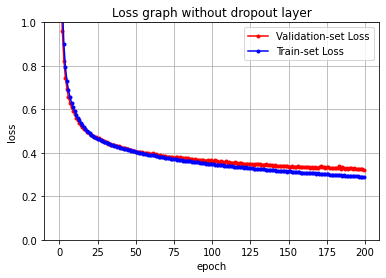

In [29]:
# loss 값을 plot 해보겠습니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

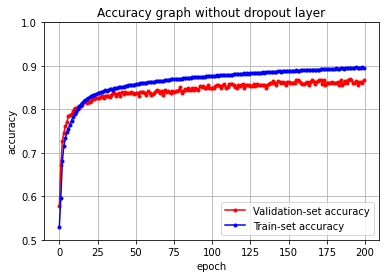

In [30]:
# accuracy 값을 plot 해보겠습니다.
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다. 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 5ms/step - loss: 2.0791 - accuracy: 0.4830 - val_loss: 1.6972 - val_accuracy: 0.5167
Epoch 2/200
117/117 [==============================] - 0s 4ms/step - loss: 1.4693 - accuracy: 0.5472 - val_loss: 1.2301 - val_accuracy: 0.6667
Epoch 3/200
117/117 [==============================] - 0s 3ms/step - loss: 1.1632 - accuracy: 0.6187 - val_loss: 1.0179 - val_accuracy: 0.6933
Epoch 4/200
117/117 [==============================] - 0s 4ms/step - loss: 0.9977 - accuracy: 0.6623 - val_loss: 0.8786 - val_accuracy: 0.7433
Epoch 5/200
117/117 [==============================] - 0s 4ms/step - loss: 0.8903 - accuracy: 0.6926 - val_loss: 0.7903 - val_accuracy: 0.7633
Epoch 6/200
117/117 [==============================] - 0s 3ms/step - loss: 0.8192 - accuracy: 0.7140 - val_loss: 0.7336 - val_accuracy: 0.7667
Epoch 7/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7708 - accuracy: 0.7259 - val_loss: 0.6958 - val_accuracy: 0.7700

Epoch 58/200
117/117 [==============================] - 0s 4ms/step - loss: 0.4232 - accuracy: 0.8507 - val_loss: 0.4016 - val_accuracy: 0.8350
Epoch 59/200
117/117 [==============================] - 0s 4ms/step - loss: 0.4223 - accuracy: 0.8494 - val_loss: 0.3985 - val_accuracy: 0.8400
Epoch 60/200
117/117 [==============================] - 0s 4ms/step - loss: 0.4172 - accuracy: 0.8519 - val_loss: 0.3963 - val_accuracy: 0.8417
Epoch 61/200
117/117 [==============================] - 0s 4ms/step - loss: 0.4180 - accuracy: 0.8524 - val_loss: 0.3950 - val_accuracy: 0.8450
Epoch 62/200
117/117 [==============================] - 0s 4ms/step - loss: 0.4160 - accuracy: 0.8531 - val_loss: 0.3957 - val_accuracy: 0.8350
Epoch 63/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4137 - accuracy: 0.8533 - val_loss: 0.3950 - val_accuracy: 0.8367
Epoch 64/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8537 - val_loss: 0.3912 - val_accuracy:

Epoch 115/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3612 - accuracy: 0.8716 - val_loss: 0.3555 - val_accuracy: 0.8550
Epoch 116/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3615 - accuracy: 0.8711 - val_loss: 0.3537 - val_accuracy: 0.8600
Epoch 117/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3596 - accuracy: 0.8721 - val_loss: 0.3540 - val_accuracy: 0.8567
Epoch 118/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3608 - accuracy: 0.8727 - val_loss: 0.3486 - val_accuracy: 0.8550
Epoch 119/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3576 - accuracy: 0.8730 - val_loss: 0.3481 - val_accuracy: 0.8550
Epoch 120/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3592 - accuracy: 0.8726 - val_loss: 0.3518 - val_accuracy: 0.8567
Epoch 121/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3588 - accuracy: 0.8732 - val_loss: 0.3516 - val_ac

117/117 [==============================] - 0s 4ms/step - loss: 0.3306 - accuracy: 0.8831 - val_loss: 0.3278 - val_accuracy: 0.8683
Epoch 172/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3270 - accuracy: 0.8835 - val_loss: 0.3290 - val_accuracy: 0.8733
Epoch 173/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3284 - accuracy: 0.8826 - val_loss: 0.3298 - val_accuracy: 0.8733
Epoch 174/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3268 - accuracy: 0.8834 - val_loss: 0.3296 - val_accuracy: 0.8683
Epoch 175/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3282 - accuracy: 0.8829 - val_loss: 0.3269 - val_accuracy: 0.8667
Epoch 176/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3290 - accuracy: 0.8829 - val_loss: 0.3258 - val_accuracy: 0.8733
Epoch 177/200
117/117 [==============================] - 0s 4ms/step - loss: 0.3267 - accuracy: 0.8827 - val_loss: 0.3279 - val_accuracy: 0.8700

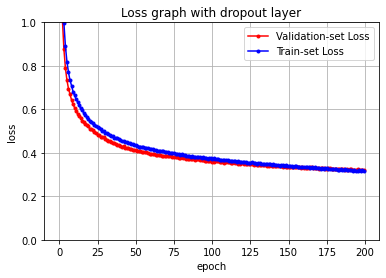

In [32]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

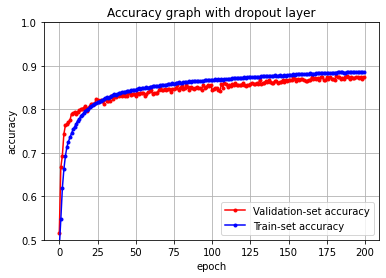

In [33]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

batch normalization  
https://arxiv.org/pdf/1502.03167.pdf
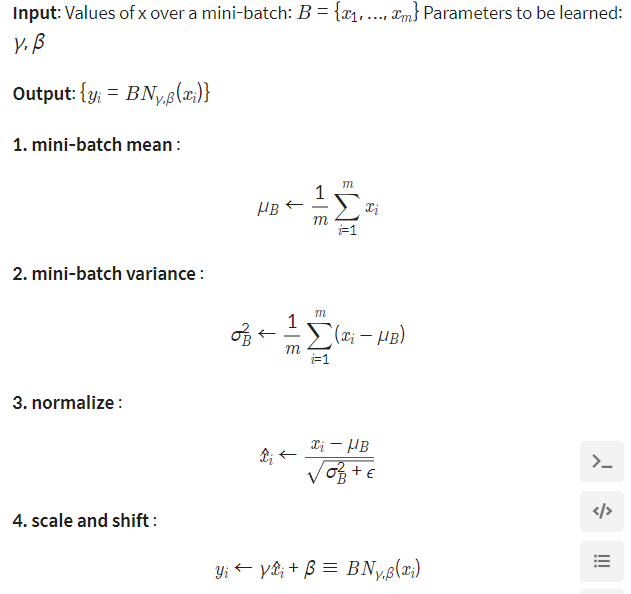

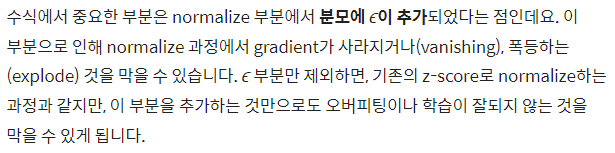

In [34]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

=3


In [35]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 39ms/step - loss: 1.2614 - accuracy: 0.5954 - val_loss: 0.7630 - val_accuracy: 0.7222
Epoch 2/20
21/21 [==============================] - 0s 9ms/step - loss: 0.6706 - accuracy: 0.7650 - val_loss: 0.6080 - val_accuracy: 0.7930
Epoch 3/20
21/21 [==============================] - 0s 9ms/step - loss: 0.5661 - accuracy: 0.8087 - val_loss: 0.5403 - val_accuracy: 0.8186
Epoch 4/20
21/21 [==============================] - 0s 10ms/step - loss: 0.5167 - accuracy: 0.8260 - val_loss: 0.5065 - val_accuracy: 0.8280
Epoch 5/20
21/21 [==============================] - 0s 10ms/step - loss: 0.4900 - accuracy: 0.8348 - val_loss: 0.4861 - val_accuracy: 0.8349
Epoch 6/20
21/21 [==============================] - 0s 9ms/step - loss: 0.4630 - accuracy: 0.8427 - val_loss: 0.4633 - val_accuracy: 0.8414
Epoch 7/20
21/21 [==============================] - 0s 8ms/step - loss: 0.4440 - accuracy: 0.8484 - val_loss: 0.4470 - val_accuracy: 0.8483
Epoch 8/20
21/21 

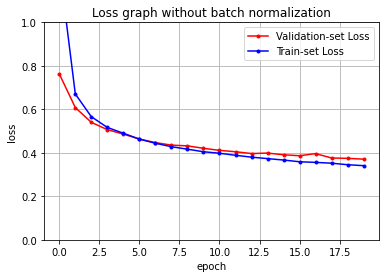

In [37]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

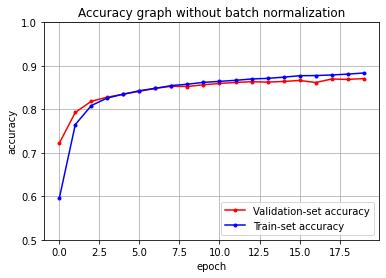

In [38]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    #여기에 batchnormalization layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 24ms/step - loss: 0.9304 - accuracy: 0.6942 - val_loss: 1.0435 - val_accuracy: 0.6869
Epoch 2/20
21/21 [==============================] - 0s 9ms/step - loss: 0.5139 - accuracy: 0.8267 - val_loss: 0.8307 - val_accuracy: 0.7533
Epoch 3/20
21/21 [==============================] - 0s 9ms/step - loss: 0.4487 - accuracy: 0.8462 - val_loss: 0.7457 - val_accuracy: 0.7854
Epoch 4/20
21/21 [==============================] - 0s 9ms/step - loss: 0.4119 - accuracy: 0.8589 - val_loss: 0.6699 - val_accuracy: 0.8106
Epoch 5/20
21/21 [==============================] - 0s 11ms/step - loss: 0.3860 - accuracy: 0.8656 - val_loss: 0.6289 - val_accuracy: 0.8181
Epoch 6/20
21/21 [==============================] - 0s 9ms/step - loss: 0.3653 - accuracy: 0.8728 - val_loss: 0.5816 - val_accuracy: 0.8348
Epoch 7/20
21/21 [==============================] - 0s 10ms/step - loss: 0.3475 - accuracy: 0.8789 - val_loss: 0.5537 - val_accuracy: 0.8351
Epoch 8/20
21/21 

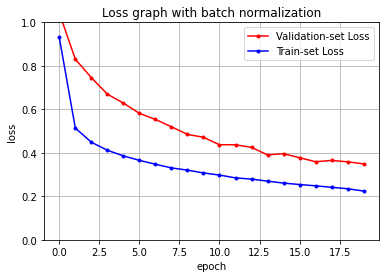

In [40]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

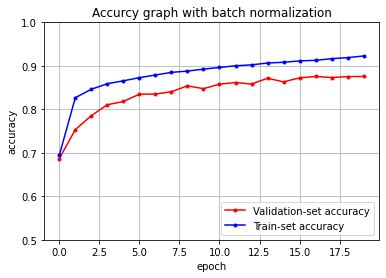

In [41]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()